In [1]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
penguins_df = sns.load_dataset('penguins')
penguins_df = penguins_df.dropna()
output = penguins_df['species']
features = penguins_df.drop(columns=['species'])
features

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
features = pd.get_dummies(features)
output, uniques = pd.factorize(output)
print(output)
print(uniques)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object')


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.2)

In [5]:
# Modelo
rfc = RandomForestClassifier(random_state=42, max_depth=10)
rfc.fit(X_train.values, y_train) # entrenar
y_pred = rfc.predict(X_test.values) # predecir
score = accuracy_score(y_pred, y_test)
print('Accuracy: ', score)

Accuracy:  1.0


Suponiendo que este modelo es el definitivo

In [6]:
# Serializar rfc para solamente cargarlo en nuestro dashboard
rf_pickle = open('random_forest_classifier.pickle', 'wb') # wb: write bytes

# 'vaciar' el mapeo al archivo pickle
pickle.dump(rfc, rf_pickle)
rf_pickle.close() # cerrar la escritura del archivo

Vamos a serializar también la información del mapeo a utilizar

In [7]:
# Serializar mapeo para cargarlo en nuestro dashboard
output_penguins_pickle = open('output_penguins.pickle', 'wb')

# 'vaciar' el mapeo al archivo pickle
pickle.dump(uniques, output_penguins_pickle)
output_penguins_pickle.close()

Generar visualizaciones útiles para mostrar en el dashboard

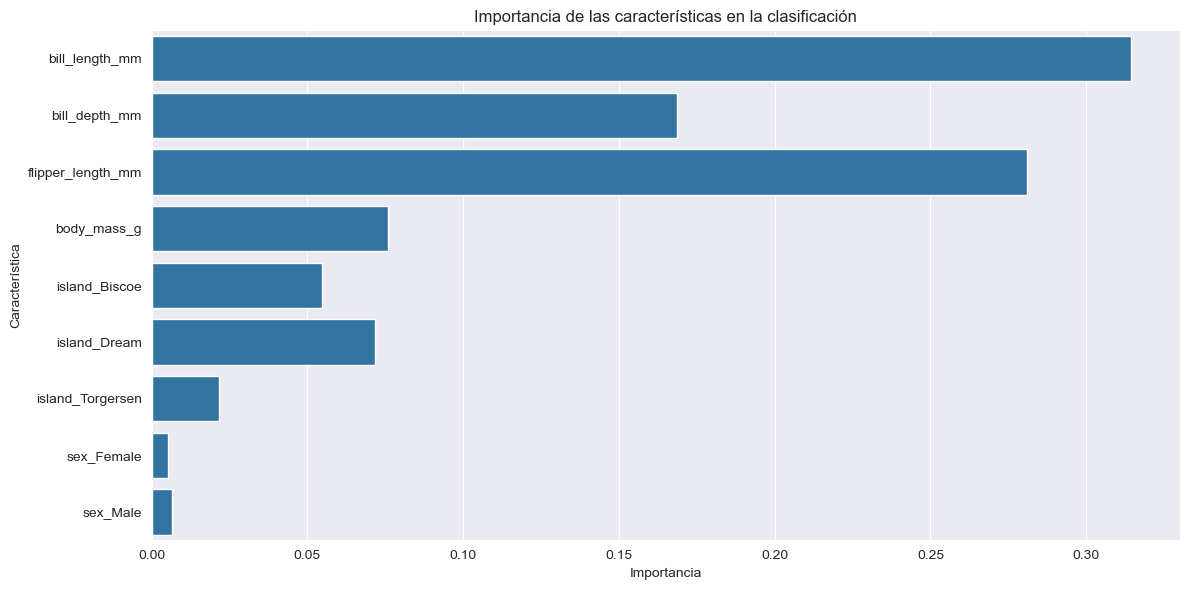

In [8]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize=(12, 6)) # canvas
sns.barplot(x=rfc.feature_importances_, y=features.columns, ax=axes)
axes.set_title('Importancia de las características en la clasificación')
axes.set_xlabel('Importancia')
axes.set_ylabel('Característica')
plt.tight_layout()
plt.show()

In [9]:
fig.savefig('feature_importance.png')